In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from plotnine import *
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.model_selection import GridSearchCV


import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.svm import SVC

import time

#DATA LOADING AND PREPROCESSING

In [ ]:
features = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/Features%20data%20set.csv")

sales = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/sales%20data-set.csv")

storesWithDMA = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/stores%20data-set-withDMA.xlsx%20-%20stores%20data-set-withDMA.csv")

In [ ]:
west = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/west.xlsx%20-%20Table%203033.csv")
northeast = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/norteast.xlsx%20-%20Table%203004.csv")
south = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/south.xlsx%20-%20Table%203024.csv")
midwest = pd.read_csv("https://raw.githubusercontent.com/a-rea/mgsc410Homework4/main/midwest.xlsx%20-%20Table%203015.csv")

In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
storesWithDMA

,Store,Type,Size,DMA
0,13,A,219622,Los Angeles
1,11,A,207499,Los Angeles
2,28,A,206302,Dallas-Ft.Worth
3,4,A,205863,Houston
4,27,A,204184,Houston
5,19,A,203819,Philadelphia
6,24,A,203819,Atlanta
7,31,A,203750,Atlanta
8,20,A,203742,Tampa-St. Pete
9,32,A,203007,Denver


In [ ]:
featureAndStore = features.merge(storesWithDMA, how='inner', on = "Store")

In [ ]:
featureAndStore

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,DMA
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,Houston
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,Houston
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,Houston
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,Houston
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,Houston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,Tampa-St. Pete
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,Tampa-St. Pete
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,Tampa-St. Pete
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,Tampa-St. Pete


In [ ]:
featuresStoresAndSales = sales.merge(featureAndStore, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
featuresStoresAndSales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,DMA
0,1,1,01/04/2011,20398.09,False,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,A,151315,Houston
1,1,1,01/06/2012,16065.49,False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,A,151315,Houston
2,1,1,01/07/2011,15363.50,False,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,A,151315,Houston
3,1,1,01/10/2010,20094.19,False,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,A,151315,Houston
4,1,1,02/03/2012,20113.03,False,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,A,151315,Houston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,30/07/2010,5.50,False,79.78,2.781,NaN,NaN,NaN,NaN,NaN,182.441538,8.743,B,118221,Tampa-St. Pete
421566,45,98,30/09/2011,727.05,False,70.66,3.645,NaN,NaN,NaN,NaN,NaN,187.256664,8.625,B,118221,Tampa-St. Pete
421567,45,98,30/12/2011,553.21,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221,Tampa-St. Pete
421568,45,98,31/08/2012,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221,Tampa-St. Pete


In [ ]:
featuresStoresAndSales = featuresStoresAndSales.rename(columns={'DMA ': 'DMA'})
featuresStoresAndSales_preMSA = featuresStoresAndSales

In [ ]:
def remove_unwanted_char(df):
  df = df.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)
  df = df.applymap(lambda x: x.replace('a/ ', '') if isinstance(x, str) else x)
  return df


In [ ]:
west = remove_unwanted_char(west)
northeast = remove_unwanted_char(northeast)
south = remove_unwanted_char(south)
midwest = remove_unwanted_char(midwest)

In [ ]:
# print the updated dataframe
northeast

,Item,All consumer units in the Northeast,New York,Philadelphia,Boston
0,Number of consumer units (in thousands),23437,7493,2437,1986
1,Income before taxes,80741,88313,88974,95276
2,Age of reference person,52.5,52.2,53.3,49.6
3,People,2.4,2.5,2.4,2.2
4,Children under 18,.5,.5,.5,.5
5,Adults 65 and older,.4,.4,.4,.4
6,Earners,1.3,1.3,1.4,1.3
7,Vehicles,1.6,1.2,1.7,1.6
8,Percent homeowner,60,49,70,55
9,Average annual expenditures,62391,67782,65436,74316


In [ ]:
def to_num(df):
  for i in df:
    if i != 'Item' and i != 'Date' and i != 'DMA' and i != 'Type':
      df[i] = pd.to_numeric(df[i])

In [ ]:
to_num(west)
to_num(northeast)
to_num(south)
to_num(midwest)

In [ ]:
def preprocess_MSA_file(df):

  #transposing the dataset to have attributes in the right spot
  dfT = df.T

  # Set the column names to be the values from the first row
  dfT.columns = dfT.iloc[0] 

  # Drop the first row, which is now duplicated as the column names
  dfT = dfT.iloc[1:]

  dfT = dfT.reset_index()

  #removing the title 'items' since it is in the wrong spot
  dfT = dfT.rename(columns={'Item': ''})

  dfT.reset_index(drop=True, inplace=True)
  dfT.columns.name = None

  dfT = dfT.rename(columns={'index': 'DMA'})

  return dfT

In [ ]:
preprocess_MSA_file(northeast)
preprocess_MSA_file(midwest)
preprocess_MSA_file(west)

,DMA,Number of consumer units (in thousands),Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,Food at home,Cereals and bakery products,Meats poultry fish and eggs,Dairy products,Fruits and vegetables,Other food at home,Food away from home,Alcoholic beverages,Housing,Shelter,Owned dwellings,Rented dwellings,Other lodging,Utilities fuels and public services,Household operations,Housekeeping supplies,Household furnishings and equipment,Apparel and services,Transportation,Vehicle purchases (net outlay),Gasoline other fuels and motor oil,Other vehicle expenses,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Tobacco products and smoking supplies,Miscellaneous,Cash contributions,Personal insurance and pensions,Life and other personal insurance,Pensions and Social Security
0,All consumer units in the West,28601.0,85107.0,49.8,2.7,0.7,0.4,1.4,2.1,58.0,66704.0,8571.0,4742.0,596.0,1008.0,486.0,958.0,1694.0,3829.0,663.0,22612.0,14210.0,7514.0,5845.0,851.0,3847.0,1565.0,788.0,2203.0,2054.0,10217.0,4170.0,2180.0,3004.0,863.0,4857.0,3540.0,854.0,143.0,1518.0,249.0,1275.0,2268.0,7882.0,322.0,7560.0
1,Los Angeles,6337.0,76471.0,49.8,2.8,0.7,0.3,1.5,1.7,52.0,66971.0,8727.0,4466.0,549.0,1050.0,423.0,970.0,1474.0,4262.0,620.0,24331.0,16454.0,7822.0,7881.0,751.0,3757.0,1583.0,761.0,1775.0,2150.0,9741.0,3346.0,2601.0,2950.0,845.0,3956.0,2764.0,868.0,110.0,2024.0,190.0,1430.0,1522.0,8538.0,307.0,8231.0
2,San Francisco,1749.0,124002.0,49.6,2.5,0.5,0.4,1.4,1.8,55.0,79291.0,8918.0,4487.0,599.0,1021.0,449.0,972.0,1447.0,4431.0,875.0,32656.0,22885.0,11958.0,9652.0,1275.0,4258.0,2580.0,560.0,2373.0,1878.0,7994.0,1904.0,1927.0,2544.0,1619.0,5013.0,3413.0,949.0,217.0,3214.0,82.0,1335.0,2412.0,10336.0,278.0,10059.0
3,San Diego,1244.0,99931.0,49.2,2.7,0.7,0.3,1.4,2.2,56.0,79585.0,9984.0,5364.0,638.0,1224.0,520.0,997.0,1985.0,4620.0,1112.0,28595.0,18677.0,10855.0,6807.0,1016.0,3760.0,2081.0,876.0,3200.0,2563.0,10592.0,3188.0,2432.0,3781.0,1191.0,5272.0,4513.0,1086.0,192.0,2453.0,189.0,1322.0,2038.0,9673.0,625.0,9049.0
4,Seattle,1640.0,117844.0,47.9,2.4,0.5,0.3,1.5,1.9,59.0,83790.0,10958.0,5978.0,754.0,1179.0,605.0,1362.0,2078.0,4980.0,986.0,26965.0,17241.0,9377.0,6881.0,982.0,3964.0,2461.0,775.0,2524.0,3884.0,12810.0,5363.0,2032.0,4037.0,1378.0,5546.0,4295.0,841.0,200.0,2036.0,257.0,1527.0,3502.0,9983.0,376.0,9608.0
5,Phoenix,1420.0,73834.0,50.0,2.5,0.7,0.4,1.3,1.8,63.0,62072.0,6856.0,3938.0,513.0,825.0,364.0,676.0,1559.0,2918.0,485.0,19491.0,10634.0,5738.0,4113.0,783.0,4071.0,1702.0,822.0,2262.0,1635.0,9985.0,4430.0,1914.0,2895.0,747.0,5328.0,3138.0,795.0,141.0,1129.0,402.0,912.0,1452.0,10323.0,266.0,10057.0
6,Denver,1422.0,105790.0,46.7,2.5,0.6,0.3,1.5,2.0,62.0,74088.0,8855.0,5057.0,622.0,1127.0,502.0,1047.0,1758.0,3798.0,771.0,25059.0,15452.0,8388.0,5727.0,1337.0,4015.0,1910.0,962.0,2720.0,2387.0,11841.0,5261.0,2028.0,3218.0,1334.0,6046.0,4340.0,1215.0,141.0,1430.0,310.0,1178.0,2397.0,8119.0,317.0,7802.0
7,Honolulu,532.0,93672.0,53.0,2.7,0.6,0.5,1.4,1.7,54.0,65099.0,10036.0,5161.0,511.0,1349.0,413.0,1071.0,1816.0,4875.0,658.0,24355.0,16502.0,6982.0,8769.0,751.0,4203.0,1441.0,716.0,1492.0,1667.0,7391.0,1954.0,1794.0,2156.0,1488.0,3977.0,3285.0,705.0,77.0,1820.0,101.0,597.0,3512.0,6919.0,251.0,6668.0
8,Anchorage,206.0,96094.0,49.1,2.6,0.6,0.3,1.5,2.5,60.0,71606.0,8306.0,5284.0,655.0,1073.0,502.0,992.0,2062.0,3022.0,788.0,23039.0,14231.0,7966.0,5342.0,924.0,4590.0,1407.0,719.0,2092.0,1648.0,12446.0,5850.0,2307.0,2780.0,1510.0,4557.0,4346.0,778.0,121.0,1523.0,482.0,1526.0,1867.0,10179.0,455.0,9724.0


In [ ]:
northeast_clean = preprocess_MSA_file(northeast)
midwest_clean = preprocess_MSA_file(midwest)
west_clean = preprocess_MSA_file(west)
south_clean = preprocess_MSA_file(south)


In [ ]:
west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item                            45 non-null     object 
 1   All consumer units in the West  45 non-null     float64
 2   Los Angeles                     45 non-null     float64
 3   San Francisco                   45 non-null     float64
 4   San Diego                       45 non-null     float64
 5   Seattle                         45 non-null     float64
 6   Phoenix                         45 non-null     float64
 7   Denver                          45 non-null     float64
 8   Honolulu                        45 non-null     float64
 9   Anchorage                       45 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.6+ KB


In [ ]:
df_concat = pd.concat([northeast_clean, midwest_clean, west_clean, south_clean])
df_concat = df_concat.reset_index(drop=True)

In [ ]:
df_concat

,DMA,Number of consumer units (in thousands),Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,Food at home,Cereals and bakery products,Meats poultry fish and eggs,Dairy products,Fruits and vegetables,Other food at home,Food away from home,Alcoholic beverages,Housing,Shelter,Owned dwellings,Rented dwellings,Other lodging,Utilities fuels and public services,Household operations,Housekeeping supplies,Household furnishings and equipment,Apparel and services,Transportation,Vehicle purchases (net outlay),Gasoline other fuels and motor oil,Other vehicle expenses,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Tobacco products and smoking supplies,Miscellaneous,Cash contributions,Personal insurance and pensions,Life and other personal insurance,Pensions and Social Security
0,All consumer units in the Northeast,23437.0,80741.0,52.5,2.4,0.5,0.4,1.3,1.6,60.0,62391.0,7611.0,4418.0,594.0,977.0,468.0,891.0,1489.0,3193.0,560.0,22063.0,14006.0,8123.0,4820.0,1063.0,3999.0,1507.0,683.0,1867.0,1951.0,8494.0,2951.0,1665.0,2914.0,964.0,4889.0,2952.0,729.0,107.0,2144.0,362.0,1088.0,2187.0,7254.0,429.0,6825.0
1,New York,7493.0,88313.0,52.2,2.5,0.5,0.4,1.3,1.2,49.0,67782.0,7689.0,4285.0,572.0,984.0,456.0,910.0,1364.0,3404.0,499.0,26113.0,18174.0,9299.0,7807.0,1068.0,4000.0,1697.0,661.0,1582.0,2291.0,7907.0,1777.0,1378.0,3167.0,1586.0,4681.0,2672.0,791.0,105.0,2733.0,245.0,999.0,3329.0,7727.0,465.0,7262.0
2,Philadelphia,2437.0,88974.0,53.3,2.4,0.5,0.4,1.4,1.7,70.0,65436.0,8203.0,4857.0,696.0,997.0,495.0,1033.0,1637.0,3345.0,492.0,20932.0,12413.0,8383.0,2905.0,1124.0,4380.0,1584.0,781.0,1775.0,2125.0,9505.0,3617.0,1843.0,3245.0,801.0,5540.0,2821.0,765.0,157.0,2702.0,401.0,1581.0,1560.0,8653.0,482.0,8171.0
3,Boston,1986.0,95276.0,49.6,2.2,0.5,0.4,1.3,1.6,55.0,74316.0,8264.0,5108.0,712.0,1033.0,519.0,1080.0,1764.0,3156.0,823.0,29015.0,18887.0,11069.0,6230.0,1588.0,4125.0,2217.0,629.0,3157.0,2134.0,8463.0,2961.0,1746.0,2678.0,1077.0,5261.0,3844.0,741.0,96.0,3101.0,344.0,1251.0,2665.0,8314.0,332.0,7982.0
4,All consumer units in the Midwest,27896.0,69473.0,51.2,2.4,0.6,0.4,1.3,2.1,67.0,56114.0,7157.0,4028.0,528.0,829.0,435.0,740.0,1497.0,3130.0,518.0,17408.0,9716.0,6165.0,2847.0,704.0,3748.0,1241.0,705.0,1999.0,1680.0,9058.0,3617.0,1902.0,2987.0,551.0,5111.0,3182.0,739.0,114.0,1256.0,397.0,969.0,1865.0,6660.0,404.0,6255.0
5,Chicago,3749.0,76639.0,49.9,2.5,0.6,0.4,1.3,1.6,63.0,60582.0,8170.0,4518.0,539.0,977.0,453.0,954.0,1595.0,3652.0,509.0,21254.0,13546.0,8455.0,4209.0,882.0,3755.0,1417.0,692.0,1844.0,1987.0,7717.0,2850.0,1770.0,2323.0,774.0,5154.0,3328.0,958.0,129.0,1673.0,216.0,1034.0,1685.0,6768.0,303.0,6465.0
6,Detroit,1957.0,80928.0,52.9,2.4,0.5,0.4,1.3,1.9,66.0,60183.0,7397.0,4113.0,563.0,887.0,392.0,809.0,1463.0,3284.0,658.0,18794.0,10429.0,6223.0,3361.0,846.0,4131.0,1515.0,713.0,2006.0,2102.0,10426.0,3409.0,1943.0,4307.0,768.0,5079.0,3002.0,848.0,94.0,1531.0,551.0,977.0,1526.0,7199.0,546.0,6653.0
7,Minneapolis- St. Paul,1633.0,91298.0,48.9,2.4,0.5,0.3,1.6,2.4,64.0,70487.0,8571.0,4712.0,596.0,915.0,485.0,973.0,1743.0,3859.0,754.0,22782.0,13901.0,8591.0,4187.0,1123.0,3554.0,1696.0,786.0,2845.0,1967.0,9409.0,3769.0,1976.0,2885.0,778.0,6242.0,4263.0,938.0,145.0,1526.0,367.0,1155.0,4269.0,8099.0,461.0,7638.0
8,St. Louis,1161.0,76108.0,50.4,2.3,0.5,0.4,1.3,2.1,75.0,62394.0,7300.0,4034.0,505.0,823.0,373.0,728.0,1605.0,3266.0,684.0,20154.0,10350.0,7172.0,2469.0,709.0,4222.0,1439.0,679.0,3465.0,1567.0,9958.0,4408.0,1981.0,2948.0,621.0,4828.0,3061.0,794.0,227.0,927.0,363.0,1577.0,4201.0,6754.0,393.0,6361.0
9,All consumer units in the West,28601.0,85107.0,49.8,2.7,0.7,0.4,1.4,2.1,58.0,66704.0,8571.0,4742.0,596.0,1008.0,486.0,958.0,1694.0,3829.0,663.0,22612.0,14210.0,7514.0,5845.0,851.0,3847.0,1565.0,788.0,2203.0,2054.0,10217.0,4170.0,2180.0,3004.0,863.0,4857.0,3540.0,854.0,143.0,1518.0,249.0

In [ ]:
print(df_concat['DMA'].unique())
print()
print(featuresStoresAndSales['DMA'].unique())

['All consumer units in the Northeast' 'New York' 'Philadelphia' 'Boston'
 'All consumer units in the Midwest' 'Chicago' 'Detroit'
 'Minneapolis- St. Paul' 'St. Louis' 'All consumer units in the West'
 'Los Angeles' 'San Francisco' 'San Diego' 'Seattle' 'Phoenix' 'Denver'
 'Honolulu' 'Anchorage' 'All consumer units in the South'
 'Washington D.C.' 'Baltimore' 'Atlanta' 'Miami' 'Dallas-Fort Worth'
 'Houston' 'Tampa']

['Houston' 'Cleveland-Akron' 'Denver' 'Austin'
 'Oralando-Daytona Brach-Melbourne FL' 'San Diego' 'Dallas-Ft.Worth'
 'Los Angeles' 'Chicago' 'Charlotte' 'Philadelphia' 'Tampa-St. Pete'
 'Salt Lake City' 'Atlanta' 'Kansas City']


In [ ]:
featuresStoresAndSales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,DMA
0,1,1,01/04/2011,20398.09,False,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,A,151315,Houston
1,1,1,01/06/2012,16065.49,False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,A,151315,Houston
2,1,1,01/07/2011,15363.50,False,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,A,151315,Houston
3,1,1,01/10/2010,20094.19,False,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,A,151315,Houston
4,1,1,02/03/2012,20113.03,False,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,A,151315,Houston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,30/07/2010,5.50,False,79.78,2.781,NaN,NaN,NaN,NaN,NaN,182.441538,8.743,B,118221,Tampa-St. Pete
421566,45,98,30/09/2011,727.05,False,70.66,3.645,NaN,NaN,NaN,NaN,NaN,187.256664,8.625,B,118221,Tampa-St. Pete
421567,45,98,30/12/2011,553.21,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221,Tampa-St. Pete
421568,45,98,31/08/2012,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221,Tampa-St. Pete


In [ ]:
df_concat.columns

Index(['DMA', 'Number of consumer units (in thousands)', 'Income before taxes',
       'Age of reference person', 'People', 'Children under 18',
       'Adults 65 and older', 'Earners', 'Vehicles', 'Percent homeowner',
       'Average annual expenditures', 'Food', 'Food at home',
       'Cereals and bakery products', 'Meats poultry fish and eggs',
       'Dairy products', 'Fruits and vegetables', 'Other food at home',
       'Food away from home', 'Alcoholic beverages', 'Housing', 'Shelter',
       'Owned dwellings', 'Rented dwellings', 'Other lodging',
       'Utilities fuels and public services', 'Household operations',
       'Housekeeping supplies', 'Household furnishings and equipment',
       'Apparel and services', 'Transportation',
       'Vehicle purchases (net outlay)', 'Gasoline other fuels and motor oil',
       'Other vehicle expenses', 'Public and other transportation',
       'Healthcare', 'Entertainment', 'Personal care products and services',
       'Reading', 'Educati

In [ ]:
#merging the stores with feature, sales, and DMA inforamtion with all the MSA regions that were concatenated into one df for analysis
featuresStoresAndSales = featuresStoresAndSales.merge(df_concat, how='left', on = ['DMA']).sort_values(by=['Store','Dept','Date'])

In [ ]:
featuresStoresAndSales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'DMA',
       'Number of consumer units (in thousands)', 'Income before taxes',
       'Age of reference person', 'People', 'Children under 18',
       'Adults 65 and older', 'Earners', 'Vehicles', 'Percent homeowner',
       'Average annual expenditures', 'Food', 'Food at home',
       'Cereals and bakery products', 'Meats poultry fish and eggs',
       'Dairy products', 'Fruits and vegetables', 'Other food at home',
       'Food away from home', 'Alcoholic beverages', 'Housing', 'Shelter',
       'Owned dwellings', 'Rented dwellings', 'Other lodging',
       'Utilities fuels and public services', 'Household operations',
       'Housekeeping supplies', 'Household furnishings and equipment',
       'Apparel and services', 'Transportation',
       'Vehicle purchases (net outlay)', '

In [ ]:
featuresStoresAndSales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,DMA,Number of consumer units (in thousands),Income before taxes,Age of reference person,People,Children under 18,Adults 65 and older,Earners,Vehicles,Percent homeowner,Average annual expenditures,Food,Food at home,Cereals and bakery products,Meats poultry fish and eggs,Dairy products,Fruits and vegetables,Other food at home,Food away from home,Alcoholic beverages,Housing,Shelter,Owned dwellings,Rented dwellings,Other lodging,Utilities fuels and public services,Household operations,Housekeeping supplies,Household furnishings and equipment,Apparel and services,Transportation,Vehicle purchases (net outlay),Gasoline other fuels and motor oil,Other vehicle expenses,Public and other transportation,Healthcare,Entertainment,Personal care products and services,Reading,Education,Tobacco products and smoking supplies,Miscellaneous,Cash contributions,Personal insurance and pensions,Life and other personal insurance,Pensions and Social Security
0,1,1,01/04/2011,20398.09,False,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,A,151315,Houston,2533.0,80250.0,46.8,2.8,0.8,0.3,1.4,1.7,59.0,67304.0,9153.0,4491.0,568.0,1087.0,373.0,905.0,1558.0,4662.0,650.0,21818.0,12823.0,7138.0,4915.0,771.0,4226.0,1526.0,808.0,2436.0,2606.0,12232.0,5469.0,2241.0,3732.0,790.0,4517.0,3413.0,844.0,93.0,1474.0,260.0,974.0,2093.0,7177.0,252.0,6926.0
1,1,1,01/06/2012,16065.49,False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,A,151315,Houston,2533.0,80250.0,46.8,2.8,0.8,0.3,1.4,1.7,59.0,67304.0,9153.0,4491.0,568.0,1087.0,373.0,905.0,1558.0,4662.0,650.0,21818.0,12823.0,7138.0,4915.0,771.0,4226.0,1526.0,808.0,2436.0,2606.0,12232.0,5469.0,2241.0,3732.0,790.0,4517.0,3413.0,844.0,93.0,1474.0,260.0,974.0,2093.0,7177.0,252.0,6926.0
2,1,1,01/07/2011,15363.50,False,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,A,151315,Houston,2533.0,80250.0,46.8,2.8,0.8,0.3,1.4,1.7,59.0,67304.0,9153.0,4491.0,568.0,1087.0,373.0,905.0,1558.0,4662.0,650.0,21818.0,12823.0,7138.0,4915.0,771.0,4226.0,1526.0,808.0,2436.0,2606.0,12232.0,5469.0,2241.0,3732.0,790.0,4517.0,3413.0,844.0,93.0,1474.0,260.0,974.0,2093.0,7177.0,252.0,6926.0
3,1,1,01/10/2010,20094.19,False,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,A,151315,Houston,2533.0,80250.0,46.8,2.8,0.8,0.3,1.4,1.7,59.0,67304.0,9153.0,4491.0,568.0,1087.0,373.0,905.0,1558.0,4662.0,650.0,21818.0,12823.0,7138.0,4915.0,771.0,4226.0,1526.0,808.0,2436.0,2606.0,12232.0,5469.0,2241.0,3732.0,790.0,4517.0,3413.0,844.0,93.0,1474.0,260.0,974.0,2093.0,7177.0,252.0,6926.0
4,1,1,02/03/2012,20113.03,False,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,A,151315,Houston,2533.0,80250.0,46.8,2.8,0.8,0.3,1.4,1.7,59.0,67304.0,9153.0,4491.0,568.0,1087.0,373.0,905.0,1558.0,4662.0,650.0,21818.0,12823.0,7138.0,4915.0,771.0,4226.0,1526.0,808.0,2436.0,2606.0,12232.0,5469.0,2241.0,3732.0,790.0,4517.0,3413.0,844.0,93.0,1474.0,260.0,974.0,2093.0,7177.0,252.0,6926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,30/07/2010,5.50,False,79.78,2.781,NaN,NaN,NaN,NaN,NaN,182.441538,8.743,B,118221,Tampa-St. Pete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421566,45,98,30/09/2011,727.05,False,70.66,3.645,NaN,NaN,NaN,NaN,NaN,187.256664,8.625,B,118221,Tampa-St. Pete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421567,45,98,30/12/2011,553.21,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221,Tampa-

#EDA BEFORE MODELLING

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

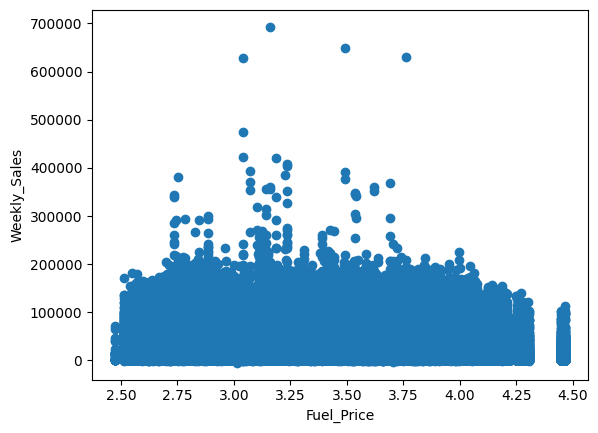

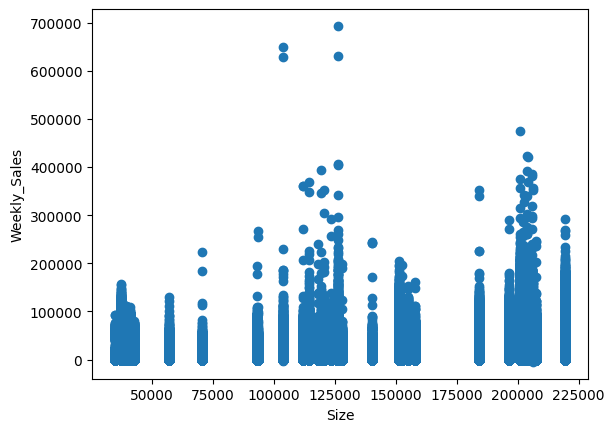

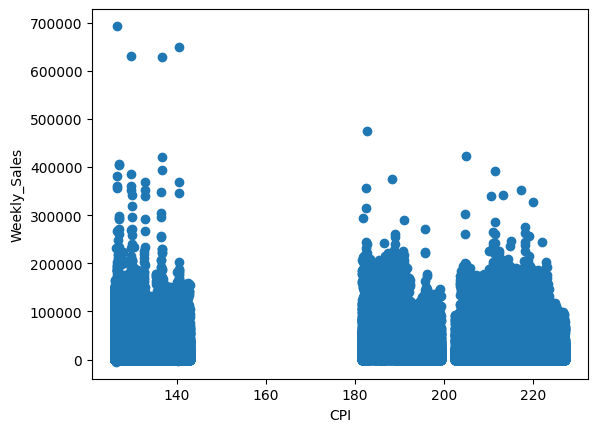

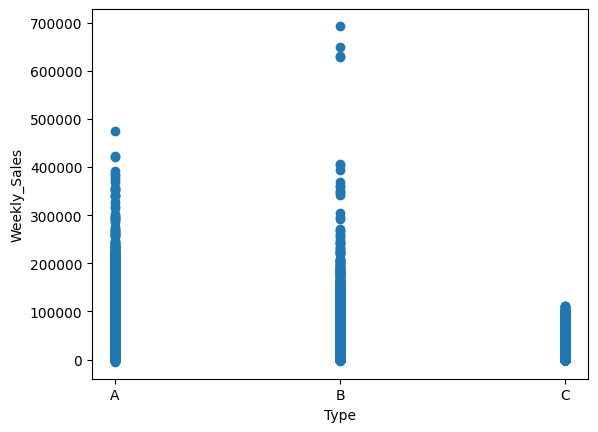

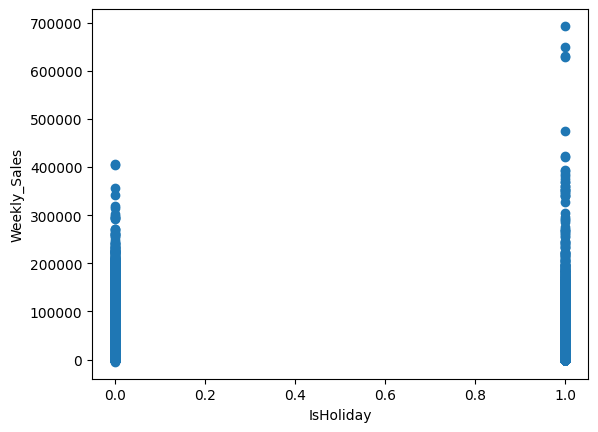

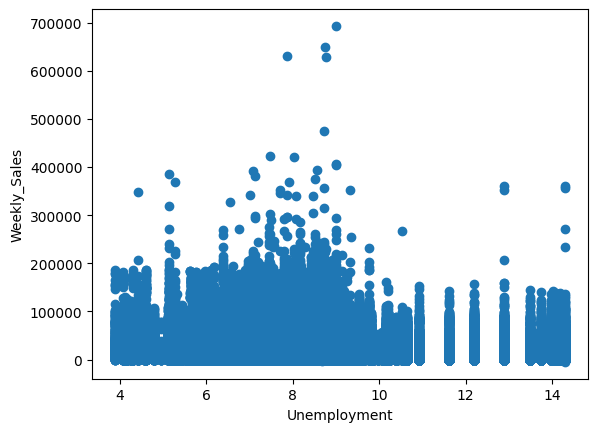

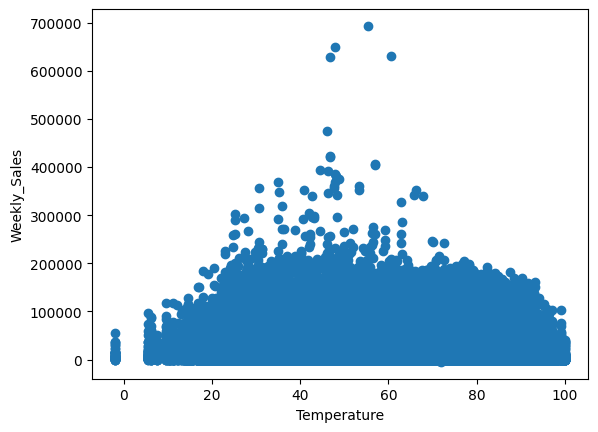

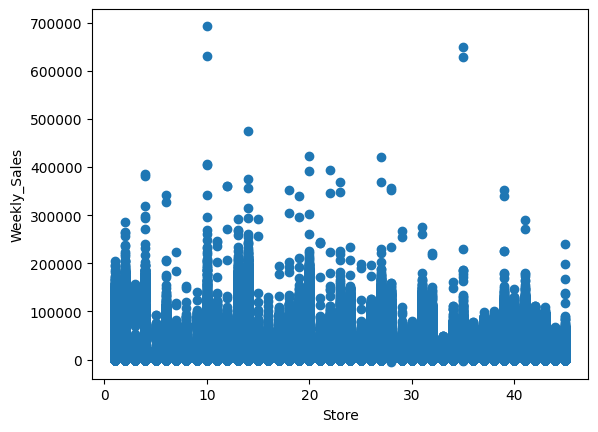

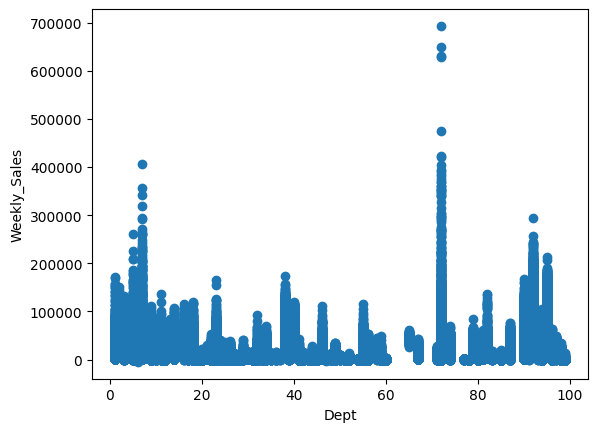

In [ ]:
scatter(featuresStoresAndSales, 'Fuel_Price')
scatter(featuresStoresAndSales, 'Size')
scatter(featuresStoresAndSales, 'CPI')
scatter(featuresStoresAndSales, 'Type')
scatter(featuresStoresAndSales, 'IsHoliday')
scatter(featuresStoresAndSales, 'Unemployment')
scatter(featuresStoresAndSales, 'Temperature')
scatter(featuresStoresAndSales, 'Store')
scatter(featuresStoresAndSales, 'Dept')

In [ ]:
print(featuresStoresAndSales['DMA'].unique())

['Houston' 'Cleveland-Akron' 'Denver' 'Austin'
 'Oralando-Daytona Brach-Melbourne FL' 'San Diego' 'Dallas-Ft.Worth'
 'Los Angeles' 'Chicago' 'Charlotte' 'Philadelphia' 'Tampa-St. Pete'
 'Salt Lake City' 'Atlanta' 'Kansas City']


In [ ]:
eda = featuresStoresAndSales

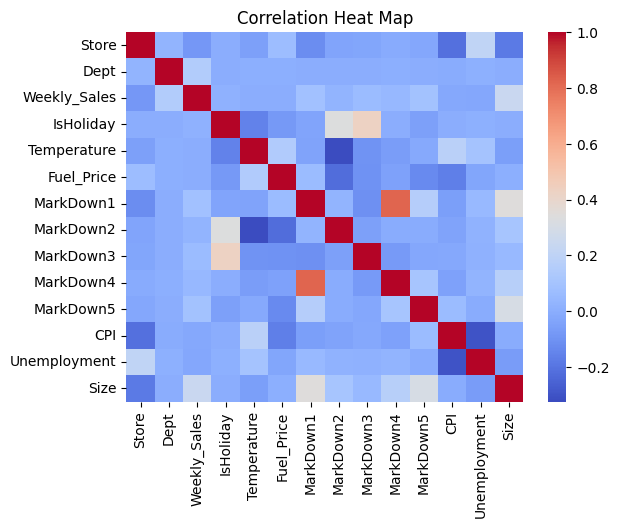

In [ ]:
corr_matrix = featuresStoresAndSales_preMSA.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')

plt.title("Correlation Heat Map")

# show the plot
plt.show()

In [ ]:
eda['Date'] = pd.to_datetime(eda['Date'])
eda['Day'] = eda['Date'].dt.day
eda['Week'] = eda['Date'].dt.week
eda['Month'] = eda['Date'].dt.month
eda['Year'] = eda['Date'].dt.year

In [ ]:
df_weeks = eda.groupby('Week').sum()

In [ ]:
import plotly.express as px
px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', 
        labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, 
        title = 'Sales over weeks')

In [ ]:
train_plt = eda.sample(frac=1)

dmas= train_plt.groupby('DMA').mean()
px.line(dmas, x = dmas.index, y = dmas.Weekly_Sales, 
        title='DMAs and sales')

In [ ]:
to_num(featuresStoresAndSales)

In [ ]:
def dma_subset_df(df, dma):
  smaller_df = df.loc[df['DMA'] == dma]
  return smaller_df


In [ ]:
for i in featuresStoresAndSales['DMA'].unique():
  print(i)

Houston
Cleveland-Akron
Denver
Austin
Oralando-Daytona Brach-Melbourne FL
San Diego
Dallas-Ft.Worth
Los Angeles
Chicago
Charlotte
Philadelphia
Tampa-St. Pete
Salt Lake City
Atlanta
Kansas City


#MODELING PORTION

In [ ]:
data = featuresStoresAndSales[featuresStoresAndSales.columns.difference(['Weekly_Sales', 'Date'])]
target = featuresStoresAndSales['Weekly_Sales']

print(data.columns)

#data = pd.get_dummies(data, columns=['DMA', 'Type', 'Dept'])
data = pd.get_dummies(data, columns=['DMA', 'Type'])

Index(['Adults 65 and older', 'Age of reference person', 'Alcoholic beverages',
       'Apparel and services', 'Average annual expenditures', 'CPI',
       'Cash contributions', 'Cereals and bakery products',
       'Children under 18', 'DMA', 'Dairy products', 'Day', 'Dept', 'Earners',
       'Education', 'Entertainment', 'Food', 'Food at home',
       'Food away from home', 'Fruits and vegetables', 'Fuel_Price',
       'Gasoline other fuels and motor oil', 'Healthcare',
       'Household furnishings and equipment', 'Household operations',
       'Housekeeping supplies', 'Housing', 'Income before taxes', 'IsHoliday',
       'Life and other personal insurance', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'Meats poultry fish and eggs',
       'Miscellaneous', 'Month', 'Number of consumer units (in thousands)',
       'Other food at home', 'Other lodging', 'Other vehicle expenses',
       'Owned dwellings', 'Pensions and Social Security', 'People',
       'Per

In [ ]:
#tts for training and validation
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)


#grid search that was used to find best parameters for our model
'''

clf = GridSearchCV(estimator=xgbReg,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=2)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

             
xgbReg = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 1000000,
                  max_depth=3,
                  learning_rate=0.01,
                  early_stopping_rounds=50)
                  
xgbReg.fit(X_train, y_train,
           eval_set=[(X_train, y_train), (X_test, y_test)],
           eval_metric='rmse', verbose = 2)


'''

xgbReg = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 1000,
                  max_depth=10,
                  learning_rate=0.15,
                  early_stopping_rounds=None,
                  colsample_bytree=0.7)
                  
xgbReg.fit(X_train, y_train,
           eval_set=[(X_train, y_train), (X_test, y_test)],
           eval_metric='rmse', verbose = 1)

In [ ]:
def dma_subset_df(df, dma):
  smaller_df = df.loc[df['DMA_'+dma] == 1]
  return smaller_df


In [ ]:
#making subsets of our large dataframe on a DMA level to predict their average weekly sales
houston_df = dma_subset_df(data, 'Houston')
cleveland_df = dma_subset_df(data, 'Cleveland-Akron')
austin_df = dma_subset_df(data, 'Austin')
orlandoDaytona_df = dma_subset_df(data, 'Oralando-Daytona Brach-Melbourne FL')
sandiego_df = dma_subset_df(data, 'San Diego')
dallas_df = dma_subset_df(data, 'Dallas-Ft.Worth')
losangeles_df = dma_subset_df(data, 'Los Angeles')
chicago_df = dma_subset_df(data, 'Chicago')
charlotte_df = dma_subset_df(data, 'Charlotte')
philadelphia_df = dma_subset_df(data, 'Philadelphia')
tampa_df = dma_subset_df(data, 'Tampa-St. Pete')
slc_df = dma_subset_df(data, 'Salt Lake City')
kansascity_df = dma_subset_df(data, 'Kansas City')

In [ ]:
xgbReg.save_model('DMA_xgb_regressor.model')
xgbRegLoaded = xgb.Booster()
xgbRegLoaded.load_model("DMA_xgb_regressor.model")

In [ ]:
preds_houston = xgbReg.predict(houston_df)
preds_cleveland = xgbReg.predict(cleveland_df)
preds_austin = xgbReg.predict(austin_df)
preds_orlandoDayton = xgbReg.predict(orlandoDaytona_df)
preds_sandiego = xgbReg.predict(sandiego_df)
preds_dallas = xgbReg.predict(dallas_df)
preds_losangeles = xgbReg.predict(losangeles_df)
preds_chicago = xgbReg.predict(chicago_df)
preds_charlotte = xgbReg.predict(charlotte_df)
preds_philadelphia = xgbReg.predict(philadelphia_df)
preds_tampa = xgbReg.predict(tampa_df)
preds_slc = xgbReg.predict(slc_df)

In [ ]:
#used for predictions with saved model that was loaded in

d_houston = xgb.DMatrix(houston_df)
d_cleveland = xgb.DMatrix(cleveland_df)
d_austin = xgb.DMatrix(austin_df)
d_orlandoDaytona = xgb.DMatrix(orlandoDaytona_df)
d_sandiego = xgb.DMatrix(sandiego_df)

d_dallas = xgb.DMatrix(dallas_df)
d_losangeles = xgb.DMatrix(losangeles_df)
d_chicago = xgb.DMatrix(chicago_df)
d_charlotte = xgb.DMatrix(charlotte_df)
d_philadelphia = xgb.DMatrix(philadelphia_df)
d_charlotte = xgb.DMatrix(charlotte_df)
d_philadelphia = xgb.DMatrix(philadelphia_df)
d_tampa= xgb.DMatrix(tampa_df)
d_slc = xgb.DMatrix(slc_df)

# used to make predictions using the freshly made xgbReg model (this is if you are connected to a current runtime on colab since this was done online)
preds_houston = xgbReg.predict(d_houston)
preds_cleveland = xgbReg.predict(d_cleveland)
preds_austin = xgbReg.predict(d_austin)
preds_orlandoDaytona = xgbReg.predict(d_orlandoDaytona)
preds_sandiego = xgbReg.predict(d_sandiego)
preds_dallas = xgbReg.predict(d_dallas)
preds_losangeles = xgbReg.predict(d_losangeles)
preds_chicago = xgbReg.predict(d_chicago)
preds_charlotte = xgbReg.predict(d_charlotte)
preds_philadelphia = xgbReg.predict(d_philadelphia)
preds_tampa = xgbReg.predict(d_tampa)
preds_slc = xgbReg.predict(d_slc)

In [ ]:
print('Average weekly sales predicted for Houston:' , sum(preds_houston)/len(preds_houston))
print('Average weekly sales predicted for Cleveland:' , sum(preds_cleveland)/len(preds_cleveland))
print('Average weekly sales predicted for Austin:' , sum(preds_austin)/len(preds_austin))
print('Average weekly sales predicted for Orlando-Daytona:' , sum(preds_orlandoDaytona)/len(preds_orlandoDaytona))
print('Average weekly sales predicted for San Diego:' , sum(preds_sandiego)/len(preds_sandiego))

In [ ]:
print('Average weekly sales predicted for Houston:' , sum(preds_houston)/len(preds_houston))
print('Average weekly sales predicted for Cleveland:' , sum(preds_cleveland)/len(preds_cleveland))
print('Average weekly sales predicted for Austin:' , sum(preds_austin)/len(preds_austin))
print('Average weekly sales predicted for Orlando-Daytona:' , sum(preds_orlandoDaytona)/len(preds_orlandoDaytona))
print('Average weekly sales predicted for San Diego:' , sum(preds_sandiego)/len(preds_sandiego))
print('Average weekly sales predicted for Dallas:' , sum(preds_dallas)/len(preds_dallas))
print('Average weekly sales predicted for Los Angeles:' , sum(preds_losangeles)/len(preds_losangeles))
print('Average weekly sales predicted for Chicago:' , sum(preds_chicago)/len(preds_chicago))
print('Average weekly sales predicted for Charlotte:' , sum(preds_charlotte)/len(preds_charlotte))
print('Average weekly sales predicted for Philadelphia:' , sum(preds_philadelphia)/len(preds_philadelphia))
print('Average weekly sales predicted for Tampa:' , sum(preds_tampa)/len(preds_tampa))
print('Average weekly sales predicted for Salt Lake City:' , sum(preds_slc)/len(preds_slc))


In [ ]:
predictions = {
    'City': ['Houston', 'Cleveland', 'Austin', 'Orlando-Daytona', 'San Diego', 'Dallas', 
             'Los Angeles', 'Chicago', 'Charlotte', 'Philadelphia', 'Tampa', 'Salt Lake City'],
    'Average Weekly Sales': [22827.658851076678, 18905.15350489615, 9754.551409524356,
                             21908.26288032753, 13261.4207940748, 16398.438197721218,
                             17112.83109604063, 14772.251944898368, 13369.642324577762,
                             20034.767625653858, 20816.447473666158, 10217.667062150735]
}

# Create a DataFrame from the predictions dictionary
city_avg_weekly_sales_pred = pd.DataFrame(predictions)

# Show the DataFrame
city_avg_weekly_sales_pred

In [ ]:
city_avg_weekly_sales_pred.sort_values(by='Average Weekly Sales', ascending=False)

In [ ]:
city_avg_weekly_sales_pred.to_csv('AverageWeeklySalesPredictions.csv', index=False)

In [ ]:
dfsToTest = (houston_df, cleveland_df, austin_df ,orlandoDaytona_df, sandiego_df, dallas_df, 
             losangeles_df, chicago_df, charlotte_df, philadelphia_df, slc_df, kansascity_df)

In [ ]:
#find the most important features in predicting average weekly sales
xgb.plot_importance(xgbReg, max_num_features=30)
plt.show()

In [ ]:
booster = xgbReg.get_booster()
importance = booster.get_score(importance_type='weight')

# Print feature importances
for feature, score in importance.items():
    print(feature, score)